In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from landlab import RasterModelGrid, imshow_grid
from landlab import imshow_grid_at_node
from landlab.components import (
    ChannelProfiler,
    ChiFinder,
    FlowAccumulator,
    SteepnessFinder,
    StreamPowerEroder,
    LinearDiffuser,
)
from landlab.io import write_esri_ascii
from landlab.io import read_esri_ascii


In [2]:
(mg, z) = read_esri_ascii("extract_example_aster.asc", name="topographic__elevation")

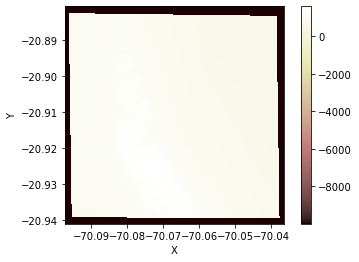

In [3]:
%matplotlib inline
imshow_grid(mg, "topographic__elevation")

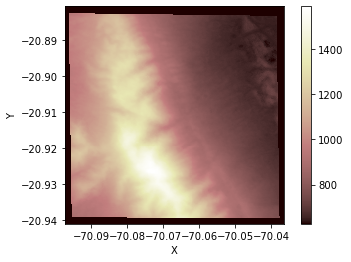

In [4]:
min_z = np.min(z[np.where(z > 0)])
max_z = np.max(z[np.where(z > 0)])
#help(imshow_grid)
imshow_grid(mg, 'topographic__elevation', limits=(min_z, max_z))

In [5]:
mg.status_at_node[np.isclose(z, -9999.)] = mg.BC_NODE_IS_CLOSED
mg.status_at_node[np.isclose(z, 0.)]= mg.BC_NODE_IS_CLOSED
#mg.set_watershed_boundary_condition('topographic__elevation') #This show an error but I used this to obtain how many watersheds are in the grid and choose one outlet first

In [6]:
mg.status_at_node[37660]= mg.BC_NODE_IS_FIXED_VALUE #THIS SHOULD MAKE THIS RUN FASTER

In [7]:
from landlab.components import SinkFillerBarnes, FlowAccumulator
sfb = SinkFillerBarnes(mg, method='Steepest')
sfb.run_one_step()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

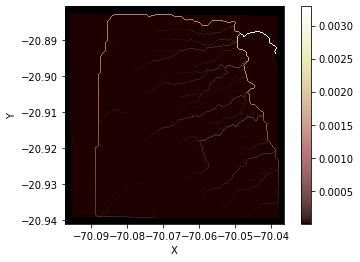

In [8]:
fr = FlowAccumulator(mg, flow_director='D8',depression_finder='DepressionFinderAndRouter')
fr.run_one_step()
fr.node_drainage_area.reshape(mg.shape)
imshow_grid(mg,'drainage_area')
mg.at_node['flow__receiver_node']  
mg.at_node['drainage_area']

In [9]:
# Plot channel profiles for one of the watersheds that drains to the node 37660

profiler=ChannelProfiler(mg, number_of_watersheds=1, minimum_outlet_threshold=0, 
                         main_channel_only=False, outlet_nodes=None, minimum_channel_threshold=0, cmap='viridis')

profiler.run_one_step()
print (profiler.data_structure.keys())
print (len(profiler.data_structure[37660].keys()))           


odict_keys([37660])
19420


In [10]:
#main channel
profiler2=ChannelProfiler(mg, number_of_watersheds=1, minimum_outlet_threshold=0, 
                         main_channel_only=True, outlet_nodes=None, minimum_channel_threshold=0, cmap='viridis')

profiler2.run_one_step()
 

In [11]:
profile_data=profiler.data_structure[37660]
profile2_data=profiler2.data_structure[37660]

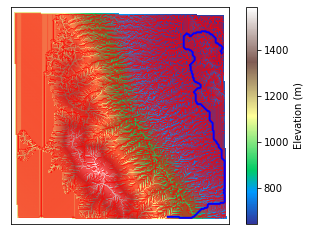

In [12]:
f, ax = plt.subplots()
imshow_grid_at_node(mg, z, cmap='terrain', colorbar_label='Elevation (m)', color_for_closed=None)
for item in profile_data:
    ax.plot(mg.x_of_node[profile_data[item]['ids']],
            mg.y_of_node[profile_data[item]['ids']],
            color='r',
            linewidth=0.5)
for item in profile2_data:
    ax.plot(mg.x_of_node[profile2_data[item]['ids']],
            mg.y_of_node[profile2_data[item]['ids']],
            color='blue',
            linewidth=2)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)